**Description:** Computing distance (or similarity) for different data types

Clustering samples correctly requires accurate measures of similarity. Depending on your data type, we will explore several ways to compute similarity (or distance). Then, we will use hierarchical clustering to group data points. At the end, you will make a clustering dendrogram.



In [1]:
import numpy as np
import scipy as sp
import scipy.spatial.distance as spdist
import scipy.stats as spstats
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import pandas as pd

# **Distance (or similarity) in science**

Have you encountered a dendrogram before?

### Hidden code

###### Dendrogram calculation and plotting

In [11]:
def plot_dendrogram(x, link_ax1, link_ax2, name1="Feature 1", name2="Feature 2",
                    name_data="Intensity"):
  """Plots data with dendrograms

  Plots data as heatmap in the center with dendrograms
  on both axis.

  Args:
    x: a 2D numpy array with data
    link_ax1: a scipy linkage for the dendrogram on axis 2
    link_ax2: a scipy linkage for the dendrogram on axis 2
    name1: string for title of left dendrogram
    name2: string for title of top dendrogram
    name_data: string for title of colorbar representing data

  Source:
    stackoverflow: Steve Tjoa
    https://stackoverflow.com/questions/2982929/plotting-results-of-hierarchical-clustering-on-top-of-a-matrix-of-data
  """
  # Plotting with dendrograms
  fig = plt.figure(figsize=(10, 6))
  # Plot ax1 dendrogram
  ax1 = fig.add_axes([0.09, 0.1, 0.2, 0.6])
  dn1 = sch.dendrogram(link_ax1, orientation='left')
  ax1.set_xticks([])
  ax1.set_yticks([])

  # Plot ax2 dendrogram
  ax2 = fig.add_axes([0.3, 0.71, 0.6, 0.2])
  dn2 = sch.dendrogram(link_ax2)
  ax2.set_xticks([])
  ax2.set_yticks([])

  # Plot data matrix
  axmatrix = fig.add_axes([0.3, 0.1, 0.6, 0.6])
  idx1 = dn1['leaves']
  idx2 = dn2['leaves']
  x_reorder = x[idx1,:]
  x_reorder = x_reorder[:,idx2]
  im = axmatrix.matshow(x_reorder,
                        aspect='auto',
                        origin='lower',
                        cmap='bwr', vmin=-1, vmax=1)
  axmatrix.set_xticks([])  # remove axis labels
  axmatrix.set_yticks([])  # remove axis labels

  # Plot colorbar.
  axcolor = fig.add_axes([0.91, 0.1, 0.02, 0.6])
  plt.colorbar(im, cax=axcolor)

  # Formatting
  ax1.set_ylabel(name1, fontsize=14)
  ax2.set_title(name2, fontsize=14)
  axcolor.set_ylabel(name_data)
  plt.show()
  pass

def _make_dendrogram_example(x):
  """Calculate dendrogram for data matrix x, using Euclidean distance
  and centroid linkage.
  """
  dist_ax1 = spdist.pdist(x, metric='euclidean')       # distance, often "D"
  link_ax1 = sch.linkage(dist_ax1, method='centroid')  # linkage, often "Z"
  dist_ax2 = spdist.pdist(x.T, metric='euclidean')
  link_ax2 = sch.linkage(dist_ax2, method='centroid')

  # plot dendrogram
  plot_dendrogram(x, link_ax1, link_ax2,
                name1="Tissue samples", name2="Genes",
                name_data="Relative Expression")
  pass

###### Fake data (x)

In [12]:
# Generate random features and distance matrix.
# Source: stackoverflow: Steve Tjoa
# https://stackoverflow.com/questions/2982929/plotting-results-of-hierarchical-clustering-on-top-of-a-matrix-of-data
np.random.seed(200)  # for reproducible data
# synthetic data
n1 = 60; n2 = 100
xx = np.random.rand(max(n1, n2))
x = np.zeros([n1, n2])
for i in range(n1):
    for j in range(n2):
        x[i,j] = xx[i] - xx[j]

### Example dendrogram

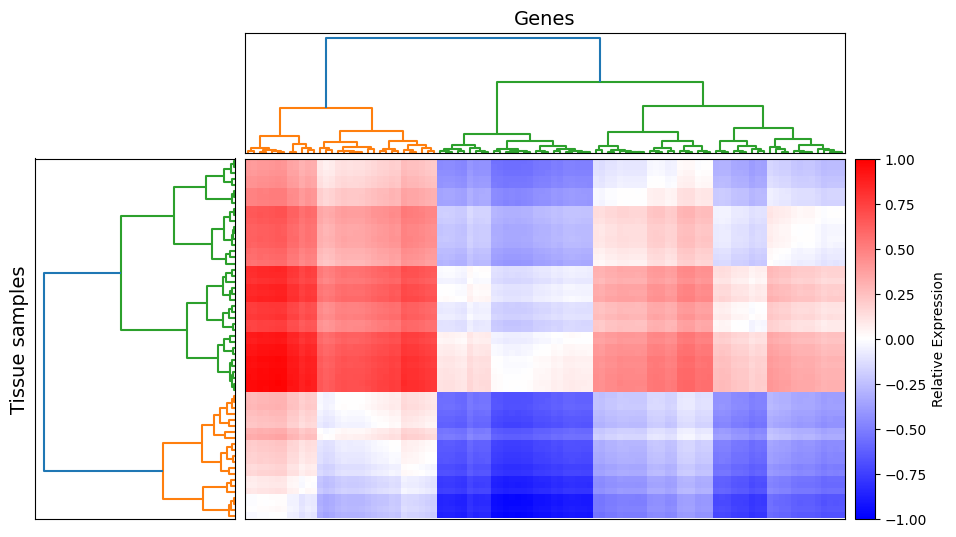

In [14]:
_make_dendrogram_example(x)

 For example, RNA transcription data can produce a huge matrix with **N** (tissue samples) x **M** (genes). To find patterns in the data, you might use clustering to group similar tissue samples or identify genes that are diferentially expressed depending on the tissue.

**To do clustering, you must define a distance!**

For this exercise, we will use hierarchical clustering using the python package **scipy**. In scipy, you select the distance metric (e.g. euclidean), and this affects the choices available for linkage method (e.g. centroid).

**<font color='red'>
Discussion question: What distance metric do you use for your data? Why?
</font>**

*Your answer*

### A recipe for dendrograms
Ingredients: data

Steps:
1.   **choose distance**
2.   choose linkage
3.   plot dendrogram
4.   rejoice?



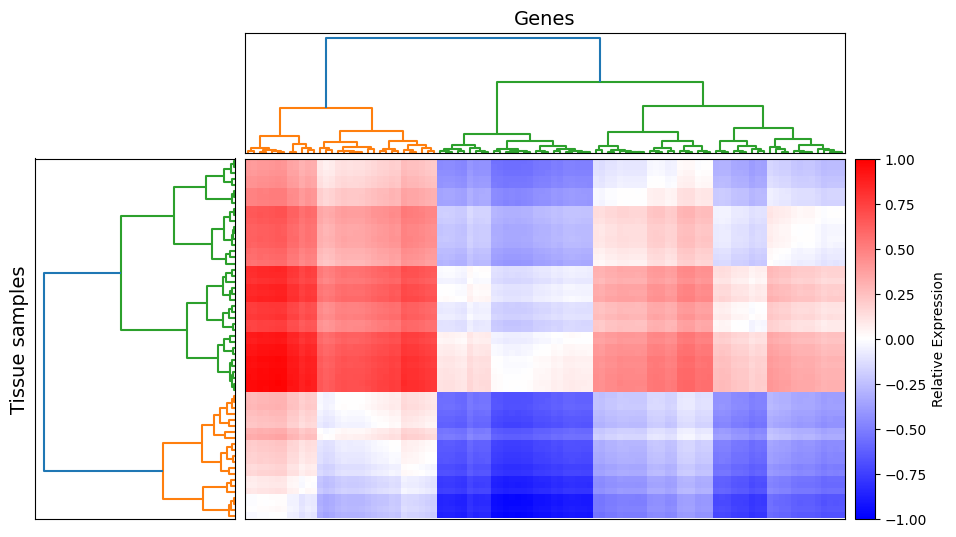

In [15]:
# Let's calculate distance some fake data "x"

# scipy.distance.pdist calculates the distance between every datapoint in
# multidimensional space.
# NOTE: the user specifices the distance metric, here 'euclidean'
dist_ax1 = spdist.pdist(x, metric='euclidean')       # distance, often "D"

# NOTE: linkage options can depend on the selected distance metric
# We won't discuss linkage in this workshop, but you can ask at the end!
link_ax1 = sch.linkage(dist_ax1, method='centroid')  # linkage, often "Z"

# repeat for second axis if desired
dist_ax2 = spdist.pdist(x.T, metric='euclidean')
link_ax2 = sch.linkage(dist_ax2, method='centroid')

plot_dendrogram(x, link_ax1, link_ax2,
                name1="Tissue samples", name2="Genes",
                name_data="Relative Expression")


# **Distance selection matters in real life**

### Hidden code

In [18]:
def plot_Chicago():
  fig, axs = plt.subplots(1, 2, figsize=[10,6])
  # source for locations: WTTW studio
  locations = [[0, 0, 'r', "Madison and State"],
              [0, 8, 'k', "North and State"],
              [-10, 36, 'b', "(Cubs) Wrigley Field"],
              [-3, -35, 'b', "(White Sox) \nGuaranteed Rate Field"],
              [-35, 54, 'b', "WTTW studio"]]
  df = pd.DataFrame(locations, columns=['x', 'y', 'color', 'name'])
  for ax in axs:
    ax.scatter(df['x'], df['y'], c=df['color'], s=60)
    for row_index, place in df.iterrows():
      ax.annotate(place['name'], (place['x']+1, place['y']+1))
    ax.set_xlabel('Distance (blocks)')
    ax.set_ylabel('Distance (blocks)')

  ax_E = axs[0]
  ax_E.set_title('Euclidean Distance')
  for row_index, place in df.iterrows():
    ax_E.plot([0, place['x']], [0, place['y']],
              alpha=0.8, linewidth=2)

  ax_M = axs[1]
  ax_M.set_title('Manhattan Distance')
  for row_index, place in df.iterrows():
    ax_M.plot([0, place['x'], place['x']],
              [0, 0,          place['y'],],
              alpha=0.8, linewidth=2)
  for ax in axs:
    ax.set_xlim([-45, 40])
    ax.set_aspect('equal', adjustable='box')
  plt.show()
  pass

### Example: Chicago

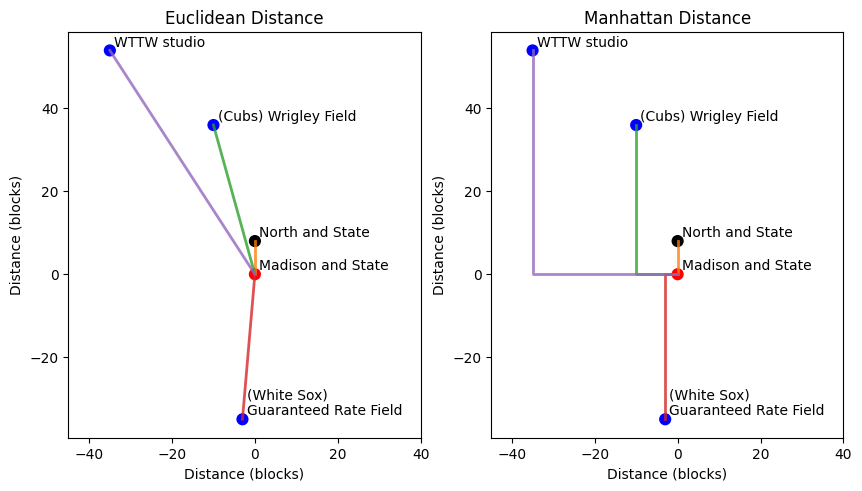

In [19]:
plot_Chicago()

**<font color='red'>Discussion question: If you're standing in the center of Chicago, are you closer to a Cub's game or a Sox game?</font>**

*Your guess!*

**<font color='red'>Coding question: calculate the Euclidean and Manhattan distances from the center of Chicago to the 2 baseball fields</font>**

In [ ]:
center = [0, 0]  # Madison & State
cubs = [-10, 36]
sox = [-3, -35]

# Hint: use scipy's distance functions!
# https://docs.scipy.org/doc/scipy/reference/spatial.distance.html

# Euclidean distance
dist2cubs =
dist2sox =

# Manhattan distance
dist2cubs =
dist2sox =

###### Answer

In [78]:
center = [0, 0]
cubs = [-10, 36]
sox = [-3, -35]

# Euclidean distance
dist2cubs = spdist.euclidean(center, cubs)
dist2sox = spdist.euclidean(center, sox)
print(f"As the crow flies, we are {dist2cubs:.0f} blocks from the cubs and {dist2sox:.0f} blocks from the sox")

# Manhattan distance
dist2cubs = spdist.cityblock(center, cubs)
dist2sox = spdist.cityblock(center, sox)
print(f"As a human walks, we are {dist2cubs:.0f} blocks from the cubs and {dist2sox:.0f} blocks from the sox")

As the crow flies, we are 37 blocks from the cubs and 35 blocks from the sox
As a human walks, we are 46 blocks from the cubs and 38 blocks from the sox


If we could fly (Euclidean distance), the Sox stadium is 2 blocks closer. If we use the streets (Manhattan distance), the Sox stadium is 8 blocks closer. In reality, we would probably take the train...

# **What *is* distance (or similarity)?**

A distance is  
*   positive or 0
*   symmetric
*   a metric distance obeys the triangle inequality theorem

Similarity is sort-of the inverse of distance (but not actually).


# **Choose your own ~adventure~ ... distance**

**You and your data:** choose based on data type and what is normal in your field. Note that the predecessors in your field may have chosen incorrectly.

## Angular data

In [21]:
# If you have angular data in degrees
a = 30
b = 350

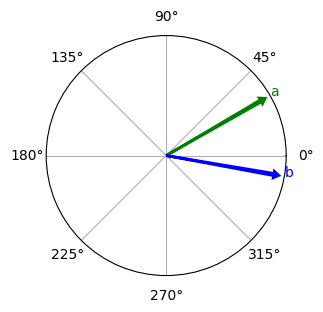

a = 30, b = 350, in degrees


In [22]:
fig = plt.figure(figsize=[3,3])
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)
r = np.arange(0, 3.0, 0.01)
rmax = 2
acolor = 'green'; bcolor = 'blue'
plt.arrow(np.deg2rad(a), 0, 0, rmax,
          width=0.02, edgecolor=acolor, facecolor=acolor,
          lw=2, zorder=5)
plt.arrow(np.deg2rad(b), 0, 0, rmax,
          width=0.02, edgecolor=bcolor, facecolor=bcolor,
          lw=2, zorder=5)
ax.set_rticks([])
ax.text(np.deg2rad(a), 1.1*rmax, 'a', color=acolor)
ax.text(np.deg2rad(b), 1.1*rmax, 'b', color=bcolor)
plt.show()

print(f"a = {a}, b = {b}, in degrees")

**<font color='red'>Coding question: what is the distance between a and b?</font>**

In [23]:
def compute_angular_distance(a, b):
  """Calculate angular distance

  Calculates the angular distance between angles a, b
  in degrees.

  Args:
    a: angle in degrees
    b: angle in degrees

  Returns:
    d: distance in degrees
  """
  arad = np.deg2rad(a)
  brad = np.deg2rad(b)
  ang_dist = np.arctan2(np.sin(arad-brad), np.cos(arad-brad))
  return np.rad2deg(ang_dist)

In [ ]:
# Angular distance
dist_ang =

# Euclidean distance
dist_eucl =

f"Angular distance={dist_ang:.1f}. Euclidean distance={dist_eucl:.1f}"

###### Answer

In [24]:
# Angular distance
dist_ang = compute_angular_distance(a, b)

# Euclidean distance
dist_eucl = spdist.euclidean([a,], [b,])

print(f"Distance between angles {a} and {b}.")
print(f"Angular distance={dist_ang:.1f}. Euclidean distance={dist_eucl:.1f}")

Distance between angles 30 and 350.
Angular distance=40.0. Euclidean distance=320.0


Euclidean distance can be a problem if you also think that -10 is equivalent to 350 degrees.

In [25]:
a = 30; b = -10
dist_ang = compute_angular_distance(a, b)
dist_eucl = spdist.euclidean([a,], [b,])
print(f"Distance between angles {a} and {b}.")
print(f"Angular distance={dist_ang:.1f}. Euclidean distance={dist_eucl:.1f}")

Distance between angles 30 and -10.
Angular distance=40.0. Euclidean distance=40.0


### FYI: Angle between 2 vectors
Revisit this later if you need to calculate the angle between 2 vectors in N-dimensional space.

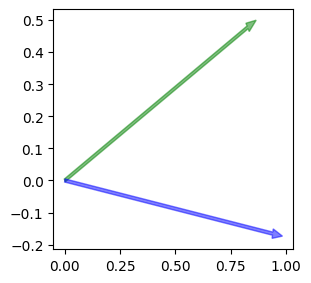

In [26]:
a1 = 30; color1 = 'green'
a2 = -10; color2 = 'blue'

v1 = [np.cos(np.deg2rad(a1)), np.sin(np.deg2rad(a1))]
v2 = [np.cos(np.deg2rad(a2)), np.sin(np.deg2rad(a2))]

fig = plt.figure(figsize=[3,3])
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax.arrow(0, 0, v1[0], v1[1],
         edgecolor=color1, facecolor=color1,
         width=0.01, head_width=0.03,
         length_includes_head=True, alpha=0.5)

ax.arrow(0, 0, v2[0], v2[1],
         edgecolor=color2, facecolor=color2,
         width=0.01, head_width=0.03,
         length_includes_head=True, alpha=0.5)

plt.show()

In [27]:
def compute_angle_between_vectors(v1, v2):
  """Calculates angle between vectors

  Calculates the angle between vectors v1, v2

  Args:
    v1: Numpy array for vector 1
    v2: Numpy array for vector 2

  Returns:
    a: Angle in degrees

  Source:
    Stackoverflow: MK83
    https://stackoverflow.com/questions/2827393/angles-between-two-n-dimensional-vectors-in-python
  """
  a = np.arctan2(np.linalg.det([v1, v2]),
             np.dot(v1, v2))
  return np.rad2deg(a)


In [146]:
compute_angle_between_vectors(v1, v2)

-39.99999999999999

# Distances related to similarity
Cosine and correlation

In [28]:
# fake data in vectors, v1, v2
np.random.seed(200)
N = 5
v1 = np.random.rand(N)
v2 = np.random.rand(N)


**<font color=red> Discussion question: What are cosine and correlation distances? </font>**

In [39]:
dist_cos = spdist.cosine(v1, v2)
dist_corr = spdist.correlation(v1, v2)
dist_Eucl = spdist.euclidean(v1, v2)

print(f"Cosine={dist_cos:.2f}, Correlation={dist_corr:.2f}, Euclidean={dist_Eucl:.2f}")

Cosine=0.25, Correlation=1.07, Euclidean=1.03


Cosine similarity = $v_1 \cdot v_2 \over |v_1| |v_2|$

Correlation similarity = $<v_1 - \mu_1><v_2 - \mu_2> \over \sigma_1 \sigma_2$

### Data transformation and distance

###### **<font color='red'>Try it question: what happens if you scale the data by 20? </font>**

In [ ]:
w1 = v1 * 20
w2 = v2 * 20

# replace the ?function? with the correction function
# Hint: look at the example above
# or use https://docs.scipy.org/doc/scipy/reference/spatial.distance.html

dist_cos = spdist.?function?(w1,w2)
dist_corr =  spdist.?function?(w1,w2)
dist_Eucl =  spdist.?function?(w1,w2)

print(f"Cosine={dist_cos:.2f}, Correlation={dist_corr:.2f}, Euclidean={dist_Eucl:.2f}")

###### Answer

In [30]:
w1 = v1 * 20
w2 = v2 * 20

dist_cos = spdist.cosine(w1, w2)
dist_corr = spdist.correlation(w1, w2)
dist_Eucl = spdist.euclidean(w1, w2)

print(f"Cosine={dist_cos:.2f}, Correlation={dist_corr:.2f}, Euclidean={dist_Eucl:.2f}")

Cosine=0.25, Correlation=1.07, Euclidean=20.56


Cosine and correlation distances are scale-invariant. However, Euclidean distance is not.

###### **<font color='red'>Try it question: what if you translate the data by adding 20?<font color='red'>**

In [ ]:
w1 = v1 + 20
w2 = v2 + 20

# replace the ?function? with the correction function
# Hint: look at the example above
# or use https://docs.scipy.org/doc/scipy/reference/spatial.distance.html

dist_cos = spdist.?function?(w1,w2)
dist_corr =  spdist.?function?(w1,w2)
dist_Eucl =  spdist.?function?(w1,w2)

###### Answer

In [31]:
w1 = v1 + 20
w2 = v2 + 20

dist_cos = spdist.cosine(w1, w2)
dist_corr = spdist.correlation(w1, w2)
dist_Eucl = spdist.euclidean(w1, w2)

print(f"Cosine={dist_cos:.2f}, Correlation={dist_corr:.2f}, Euclidean={dist_Eucl:.2f}")

Cosine=0.00, Correlation=1.07, Euclidean=1.03


*    Correlation distance is invariant to both scale and translation.
*    Cosine distance is scale-invariant only.
*    Euclidean distance is NOT scale-invariant.

**You and your data:** Remember to normalize your data if you use Euclidean distance!

# High-dimensional, noisy data

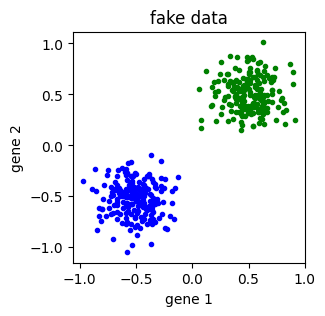

In [89]:
# Let's make some fake data in clusters
N = 200
c = 0.5; s = c/3
np.random.seed(200)
x1 = np.random.randn(N, 2) * s
x1 += [c, c]

x2 = np.random.randn(N, 2) * s
x2 += [-c, -c]

fig = plt.figure(figsize=[3,3])
ax = fig.add_subplot()
ax.plot(x1[:,0], x1[:,1], '.', color='green')
ax.plot(x2[:,0], x2[:,1], '.', color='blue')
ax.set_xlabel('gene 1')
ax.set_ylabel('gene 2')
ax.set_title('fake data')
plt.show()

Let's pretend you have N samples and 2 genes that are highly correlated and can separate the data into 2 clusters.

**<font color='red'>Try it question: What happens if you tune the number of "noisy genes" (columns) that add no information?</font>**

In [99]:
# Try increasing the number of noisy genes
M = 40  # noise columns

# Add the noise as extra columns
noise = np.random.rand(N, M) - 0.5
x1_noisy = np.column_stack((x1, noise))
noise = np.random.rand(N, M) - 0.5
x2_noisy = np.column_stack((x2, noise))

# Fake data
x = np.row_stack((x1_noisy, x2_noisy))

###### Euclidean distance

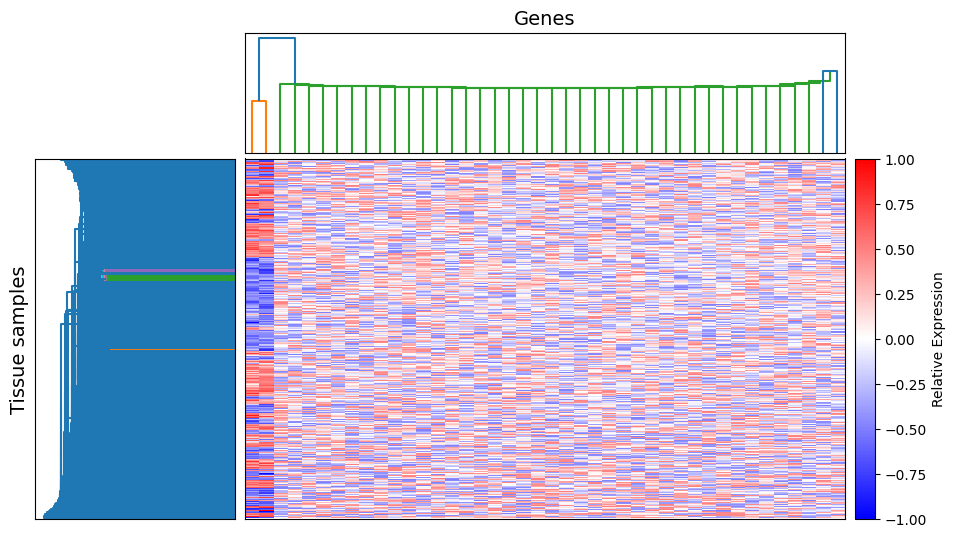

In [100]:
dist_ax1 = spdist.pdist(x, metric='euclidean')       # distance, often "D"
link_ax1 = sch.linkage(dist_ax1, method='centroid')  # linkage, often "Z"
dist_ax2 = spdist.pdist(x.T, metric='euclidean')
link_ax2 = sch.linkage(dist_ax2, method='centroid')

plot_dendrogram(x, link_ax1, link_ax2,
                name1="Tissue samples", name2="Genes",
                name_data="Relative Expression")

### Welcome to the curse of dimensionality!


###### Cosine distance
Note that cosine distance does not necessarily free you from the curse. Try increasing the amount of noise by increasing M above!

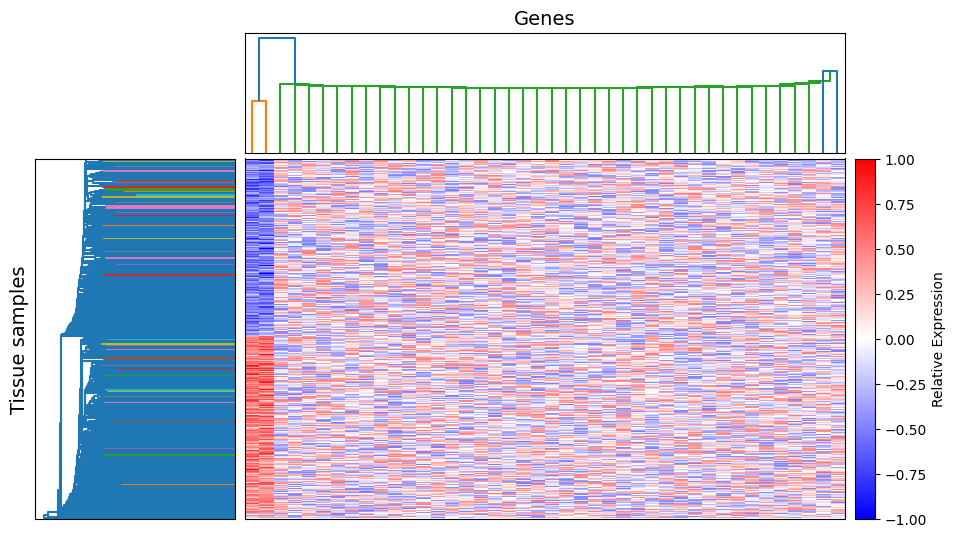

In [101]:
dist_ax1 = spdist.pdist(x, metric='cosine')  # note change!
link_ax1 = sch.linkage(dist_ax1, method='single')  # linkage
dist_ax2 = spdist.pdist(x.T, metric='euclidean')
link_ax2 = sch.linkage(dist_ax2, method='centroid')

plot_dendrogram(x, link_ax1, link_ax2,
                name1="Tissue samples", name2="Genes",
                name_data="Relative Expression")
